# __Proyecto de clustering de segmentación de países por datos socio-económicos__

## Importar librerías

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

## Carga de datos

In [28]:
df_country = pd.read_csv('Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [29]:
df_country.shape

(167, 10)

> El dataset esta constituido por 10 columnas y 167 filas

## Conociendo los datos

La organizacion HELP International es una ONG humanitaria internacional comprometida a combatir la pobreza y proporcionar a la población de los países atrasados ​​servicios básicos y socorro en tiempos de desastres y calamidades naturales.

HELP International ha logrado recaudar alrededor de 10 millones de dólares. Ahora, el director ejecutivo de la ONG debe decidir cómo utilizar este dinero de forma estratégica y eficaz. Por lo tanto, debe elegir los países que más necesitan ayuda. Por lo tanto, su trabajo como científico de datos consiste en categorizar los países utilizando factores socioeconómicos y sanitarios que determinan su desarrollo general. A continuación, debe sugerir los países en los que el director ejecutivo debe centrarse más.

El dataset con el que se cuenta tiene la siguiente informacion:

- _country_: pais.

- _child_mort_: Muerte de niños menores de 5 años por cada 1000 nacidos vivos.

- _exports_: Exportaciones de bienes y servicios per cápita. Expresadas como porcentaje del PIB per cápita.

- _health_: Gasto total en salud per cápita. Expresado como porcentaje del PIB per cápita.

- _imports_: Importaciones de bienes y servicios per cápita. Expresadas como porcentaje del PIB per cápita.

- _income_: Ingreso neto por persona.

- _inflation_: La medición de la tasa de crecimiento anual del PIB total.

- _life_expec_: El número promedio de años que viviría un recién nacido si los patrones de mortalidad actuales se mantuvieran

- _total_fer_: El número de hijos que tendría cada mujer si las tasas actuales de fertilidad por edad se mantuvieran iguales.

- _gdpp_: El PIB per cápita. Se calcula dividiendo el PIB total entre la población total.

## Manejando valores nulos

In [30]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


> Todas las variables estan en formato numerico excepto country.

> Todas las variables poseen 167 valores lo que indica que no hay valores nulos.

In [31]:
# Verificar cuantas variables presentan valores nulos
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

> Se evidencia que todas las variables estan libres de valores nulos.

## Validando duplicados

In [32]:
# eleccionamos todos los registros duplicados
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


> No se presentan registros duplicados en el dataset

## Análisis de distribución

Analicemos la distribucion de los datos para detectar outliers estadisticos. Vamos a seleccionar todas las variables que no sean de tipo object

In [33]:
int_cols = df_country.select_dtypes(exclude='object').columns
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Graficamos la distribucion de cada variable mediante un boxplot.

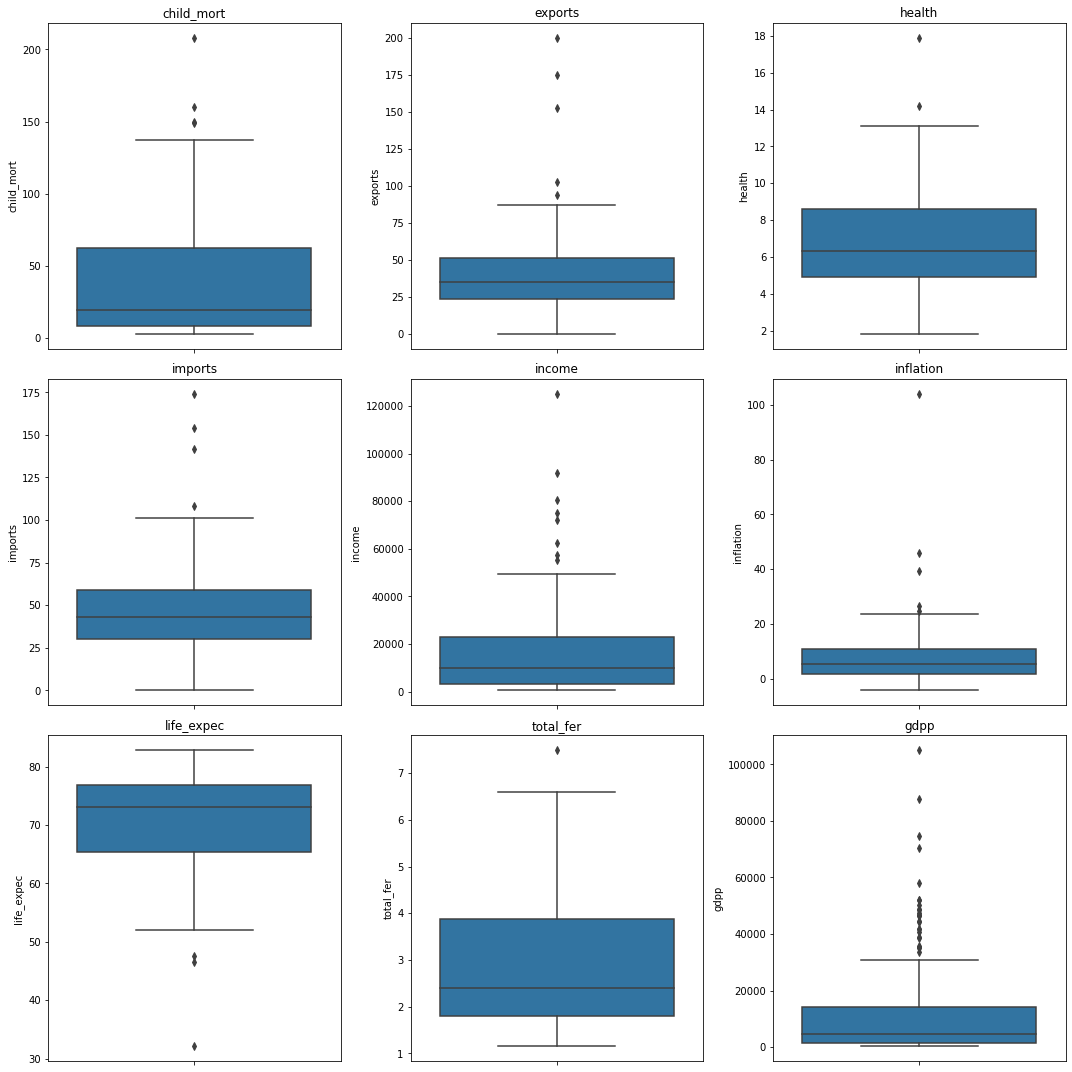

In [34]:
num_plots = len(int_cols)

# Número de filas deseadas para la grilla
rows = 3  
# Número de columnas deseadas para la grilla
cols = num_plots // rows + (num_plots % rows > 0)  

# Ajusta el tamaño de la figura según tus necesidades
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  

for i, col in enumerate(int_cols):
    # Obtén el eje correspondiente
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  
    sns.boxplot(data=df_country, y=col, ax=ax)
    # Opcional: establece el título de cada gráfico
    ax.set_title(col)  

# Ajusta el espaciado entre los gráficos
plt.tight_layout()  
plt.show()


> Hay paises con tasas de mortalidad infantil muy altas comparadas con la mayoria.

> En export se muestran outliers por encima del 100% lo que sugiere que algunos paises exportan mas de lo que producen.

> En imports vemos que algunos paises tienen importaciones muy altas, fuera de la distribucion normal.

> La distribucion de income esta sesgadaa la derecha. Hay paises con ingresos muy altos representados como outliers positivos.

> La mayoria de los paises tienen inflacion por debajo del 20%. Pero tambien hay unos tantos paises con hiperinflacion (mayor al 60%).

> Hay un pais con una taza de fertifilidad muy alta con mas de 6 hijos por mujer.

> La distribucion de PIB es similar a la de income con algunos paises con un PIB per capita extremadamente alto.

> La presencia de muchos outliers en las variables indica la desigualdad entre paises. No se requiere eliminarlos debido a que hacen parte de la informacion de los datos, no son datos salidos de la nada estadisticamente hablando. Representan una realidad


Creamos una heatmap para visualizar la correlacion entre las variables numericas.

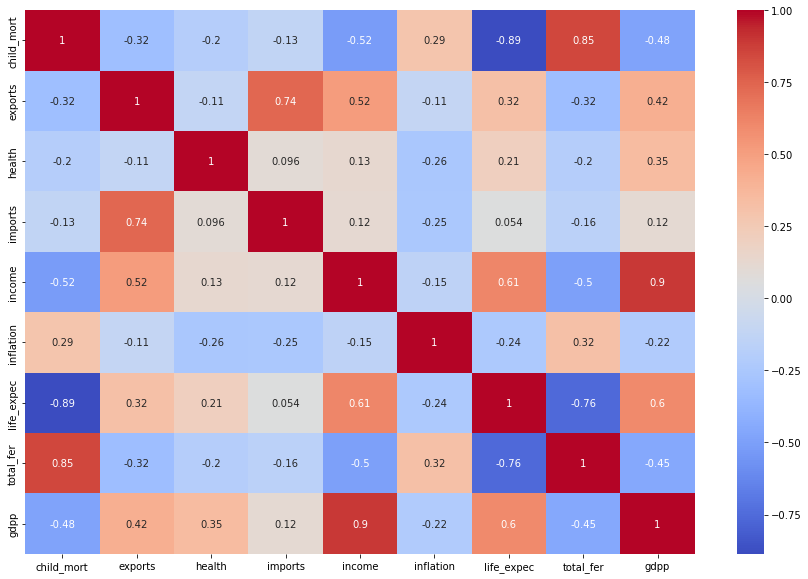

In [35]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm')
plt.show()

> El income y gdpp estan altamente correlacionado de manera positiva. Esto indica que los ingresos de un pais esta directamente relacionado con su PIB.

> La taza de mortalidad infantil esta altamente correlacionado con la esperanza de vida de manera negativa. Un aumento en la mortalidad infantil reduce la esperanza de vida.

> La tasa de mortalidad infantil tambien esta altamente correlacionada con el taza de fertilidad de manera negativa. Un aumento en la mortalidad infantil se refleja en una reduccion de la tasa de fertilidad.

> Las exportaciones tiene alta correlacion positiva con las importaciones.

> Las exportaciones tambien se correlacionan en gran medida con los ingresos del pais.

> La esperanza de vida presenta una correlacion alta con el PIB del pais

> La esperanza de vida esta relacionada negativamente con la taza de fertilidad.

> Todas las variables son importantes debido a sus relaciones, por tanto, no se omite ninguna.

## Escalar datos

Procedemos a llevar todos los datos a una misma escala con el fin de que al aplicar los algoritmos de clusterizacion, las distancias sean interpretadas correctamente y no le de un mayor peso a ciertos datos.

In [36]:
# importamos objeto para escalar los datos con la desviacion estandar
from sklearn.preprocessing import StandardScaler

# instanciamos el objeto
scaler = StandardScaler()

# Elimina 'country' porque es categorica y no se puede escalar
# ajusta el escalador a los datos y los escala
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))

df_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

Volvemos un dataframe los datos ecalados nuevamente

In [37]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country', axis=1).columns)
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

In [38]:
# importamos el objeto PCA
from sklearn.decomposition import PCA

In [39]:
# instanciamos el objeto
# al no especificar el numero de componentes, se calcula uno por cada variable
pca = PCA()

# ajustamos los datos a pca
pca.fit(df_country_scaled)

# transforma los datos al nuevo espacio de componentes principales
pca_data_scaled = pca.transform(df_country_scaled)

pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

Obtenemos el PCA de cada variable original. Ahora vamos a calcular el radio de varianza

In [40]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


> Arroja la varianza por cantidad de componentes

> Para trabajar con n componentes principales se requiere obtener la suma acumulada hasta el indice n.

El objetivo es reducir la cantidad de variables a utilizar para que la clusterizacion sea mas efectiva. En lo que sigue, vamos a graficar la suma acumulada del radio de varianza para cada componente. De esta forma podremos estimar el numero de componentes principales adecuado que capture la mayor cantidad de varianza de los datos.

Text(0, 0.5, '% Variance')

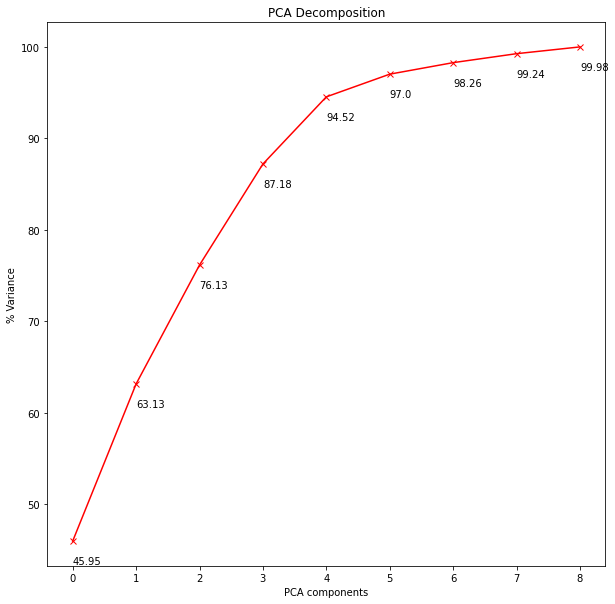

In [41]:
# Calculo de la suma acumulada por componente en porcentaje
cum_var = np.cumsum(np.round(var, decimals=4)*100)

# numero total de componentes
components = list(range(0,9))

# grafico
plt.figure(figsize=(10,10))
for s,d in zip(components,cum_var):
    plt.annotate(np.round(d,decimals=2), xy=(s,d-2.5))

plt.plot(components,cum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

> La grafica muestra que 4 componentes principales abarca casi el 90% de la varianza de los datos. Con 5, se alcanza el 95%

> Como el objetivo es reducir la dimnensionalidad, nos quedamos con 4 componentes principales

In [42]:
# convertimos el dataframe los datos con pca aplicado
pca_data_standard = pd.DataFrame(pca_data_scaled)

# seleccioonamos la 4 primeras componentes principales
pca_data_standard.drop([4,5,6,7,8], axis=1, inplace=True)

pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


> Todas las variables se resumen a las 4 componentes principales seleccionadas ya que estas conservan gran parte de la varianza de los datos.

> Perdemos una parte de la informacion pero para el clustering es mejor tener poca dimensionalidad para encontrar la distancia entre los clusteres.

## Importar librerías para clustering

In [43]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Resolviendo con K-means

### PCA

Aplicamos el modelo k-means sobre los datos a lo que se aplico PCA.

In [44]:
# suma de los cuadrados de la distancias
sum_of_squared_distances = []
# lista para almacenar los indices de silueta
silhouette_scores = []
# rango de K
K = range(2,15)

# iteramos el modelo sobre cada K
for _ in K:
    km = KMeans(n_clusters=_)
    y_pred = km.fit_predict(pca_data_standard)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard, y_pred)) 


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

Generamos un grafico de K en funcion de la inercia para obtener el grafico del codo (Elbow) y encontrar el numero optimo de clusteres.

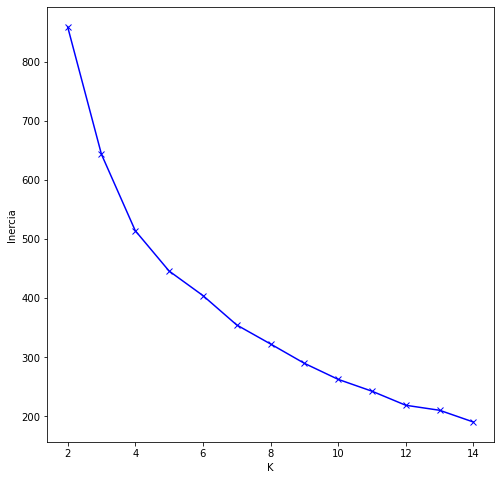

In [45]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inercia')
plt.show()

> El numero optimo de K ronda entre 4 y 5.

Ahora , obtenemos el grafico del indice de silueta.

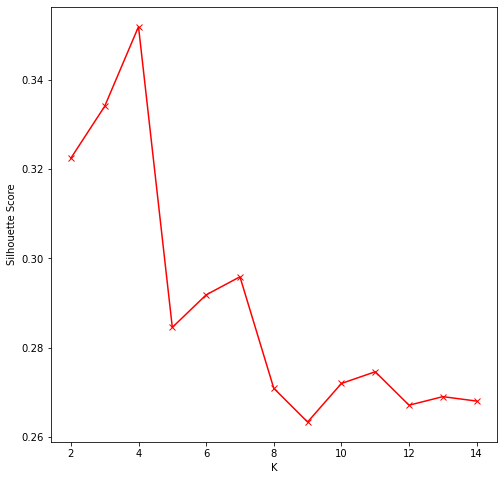

In [46]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

> Esta grafica muestra que efectivamente K = 4 es el numero optimo de clusteres 

Una ves definido el valor de K, procedemos a usar KMeans con K sobre los datos y obtener el clutering de cada pais.

In [47]:
km = KMeans(n_clusters=4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))

df_country['k_means_pca'] = y

0.3522170843293593


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Sin PCA

Vamos a utilizar los datos sin PCA para entrenar el modelo kmeans y clasificar los datos

In [48]:
# suma de los cuadrados de la distancias
sum_of_squared_distances = []
# lista para almacenar los indices de silueta
silhouette_scores = []
# rango de K
K = range(2,15)

# iteramos el modelo sobre cada K
for _ in K:
    km = KMeans(n_clusters=_)
    y_pred = km.fit_predict(df_country_scaled)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled, y_pred)) 


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

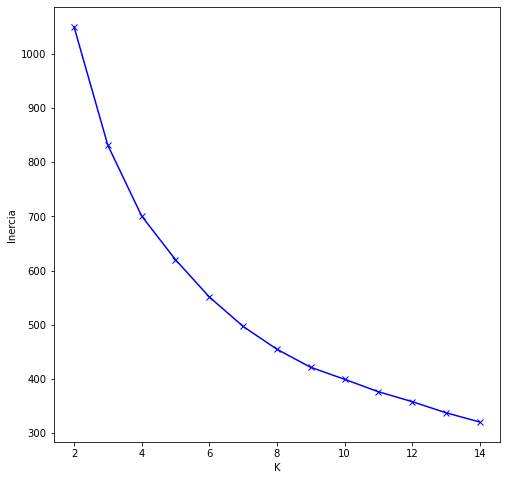

In [49]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inercia')
plt.show()

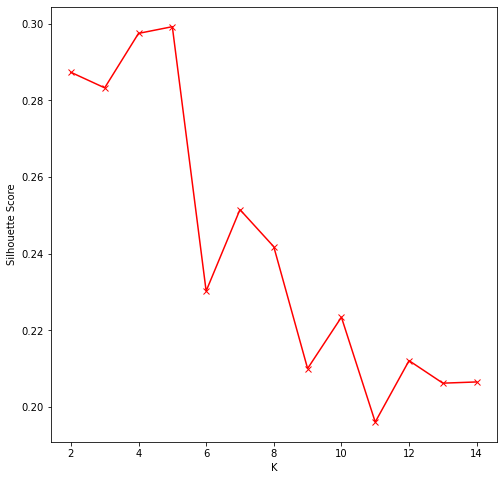

In [50]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

## Agglomerativen hierarchical clustering

### PCA

### Sin PCA

## DBSCAN

### PCA

### Sin PCA

## Evaluación de resultados